<a href="https://colab.research.google.com/github/Ssergeymiss/ComputerVision/blob/main/Alzheimer's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
for dirname,_,filenames in os.walk('/kaggle/Input'):
  for filenames in filenames:
     os.path.join(dirname, filename)

In [ ]:
import matplotlib.pyplot as plt 
from PIL import Image

In [ ]:
dir = "/content/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset"
test_dir = os.path.join("/content/faces_splited/test") 
train_dir =os.path.join("/content/faces_splited/train") 
val_dir =os.path.join("/content/faces_splited/val") 

In [ ]:
! pip install kaggle
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json
!pip install opendatasets

import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Skipping, found downloaded files in "./augmented-alzheimer-mri-dataset" (use force=True to force download)


**#It will help us divide the data into three datasets**

In [ ]:
!pip install split-folders 
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

input_folder="/content/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset"
splitfolders.ratio(input_folder, 'faces_splited', ratio = (0.65, 0.2, 0.15), seed=1337, group_prefix=None)


Copying files: 33984 files [00:23, 1429.09 files/s]


**#Let's look at our data**

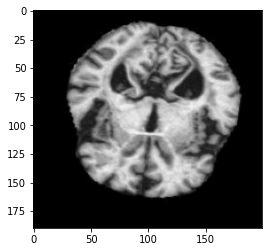

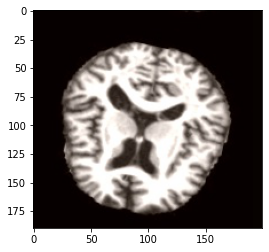

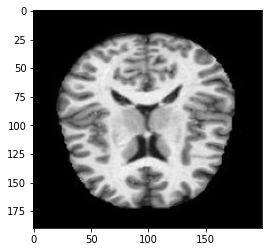

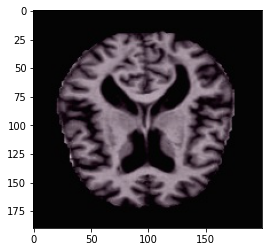

In [ ]:
categ = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
for ca in categ:
    path = os.path.join(train_dir,ca)
    for img in os.listdir(path):
        img_arr =Image.open(os.path.join(path,img)) 
        arr = np.array(img_arr)
        plt.imshow(np.array(img_arr),cmap='gray')
        plt.show()
        break

<class 'numpy.ndarray'>
(180, 180, 3)


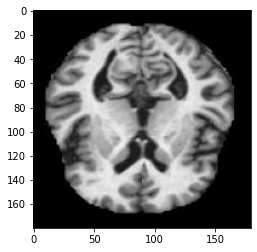

In [ ]:
cart='MildDemented'
pyt=os.path.join(train_dir,cart)
img_arr=Image.open(os.path.join(path,os.listdir(path)[1005]))
img_arr=np.array(img_arr)
print(type(img_arr))
print(img_arr.shape)
plt.imshow(img_arr,cmap="gray")
plt.imshow(img_arr)

**Let's start marking up the data**

In [ ]:
  for ca in categ:
    path=os.path.join(dir,ca)
    class_num=categ.index  
    print(categ.index)  

<built-in method index of list object at 0x7f6816948050>
<built-in method index of list object at 0x7f6816948050>
<built-in method index of list object at 0x7f6816948050>
<built-in method index of list object at 0x7f6816948050>


In [ ]:

def create_data(my_list,categ,my_dir):
  image_size=150
  for ca in categ:
    
       
    print(ca)
    path=os.path.join(my_dir,ca)
    class_num=categ.index
    print(class_num)
    for img in os.listdir(path):#listdir - список файлов
      try:#Это-а хуета называется исключением, если не получается ресшейпнуть фотку, то мы ее пропускаем
        #print(ca)
        img_arr=Image.open(os.path.join(path,img)).convert("L")
        new_image=img_arr.resize((image_size,image_size))
        new_image=np.asarray(new_image)#переводим входные данные в массив
        #arr=new_image.reshape(150,150,1)
        arr=new_image.reshape(150,150,1)
        if ca == "MildDemented":
          my_list.append([arr,0])
        if ca == "ModerateDemented":
          my_list.append([arr,1])
        if ca == "NonDemented":
          my_list.append([arr,2])
        if ca == "VeryMildDemented":
          my_list.append([arr,3])
       # print(type(class_num))
        
          
      except Exception as e:
        e=e
print(categ.index)
train_list = []
test_list = []
val_list = []
create_data(train_list,categ,train_dir)

<built-in method index of list object at 0x7f6816948050>
MildDemented
<built-in method index of list object at 0x7f6816948050>
ModerateDemented
<built-in method index of list object at 0x7f6816948050>
NonDemented
<built-in method index of list object at 0x7f6816948050>
VeryMildDemented
<built-in method index of list object at 0x7f6816948050>


**Moving the data**

In [ ]:
import random

In [ ]:
create_data(test_list,categ,test_dir)
create_data(val_list,categ,val_dir)

MildDemented
<built-in method index of list object at 0x7f6816948050>
ModerateDemented
<built-in method index of list object at 0x7f6816948050>
NonDemented
<built-in method index of list object at 0x7f6816948050>
VeryMildDemented
<built-in method index of list object at 0x7f6816948050>


In [ ]:
random.shuffle(train_list, random.random)
random.shuffle(test_list, random.random)
random.shuffle(val_list, random.random)

In [ ]:
len(test_list)

In [ ]:
def split_data(X,y,my_list):
  image_size=150
  for fe,la in my_list:#Здесь мы переносим в две переменные данные из датасетов
    #fe-features,la-label
    print(la)
    X.append(fe)
    y.append(la)
    
  X=np.array(X).reshape(-1,image_size,image_size,1)

In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []
X_val = []
y_val = []


**We will divide our data into test, training and validation samples**

In [ ]:
split_data(X_train, y_train, train_list)
split_data(X_test, y_test, test_list)
split_data(X_val, y_val, val_list)

In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)

**We standardize our data**

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

**Let's download the required libraries**

In [1]:
!pip install keras
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras import layers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import keras
import numpy as np
import sklearn.model_selection
from keras import layers
from keras import models 
!pip install keras_visualizer 
from keras_visualizer import visualizer 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, GlobalMaxPooling2D
inputs=keras.Input(shape=(150,150,1))
from keras import regularizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**We will compose the architecture of the neural network**

**Artificially increase our sample by reflection and rotations**

---



In [3]:

x = tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal')(inputs)
x = tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.20, width_factor=0.20)(x)
x = tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.09)(x)

def res_net_block(input_data, filters, conv_size):
    x = layers.Conv2D(filters, conv_size, activation='relu', padding='same')(input_data)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, conv_size, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, input_data])
    x = layers.Activation('relu')(x)
    return x

# model itself
#x = keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=(150, 150, 1), padding='same', activation="relu")(x)
#x=layers.MaxPooling2D()(x)

x = keras.layers.Conv2D(filters=256, kernel_size=3, input_shape=(150,150, 1), padding='same', activation="relu")(x)
x=layers.MaxPooling2D()(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=(150,150, 1), padding='same', activation="relu")(x)
x = layers.BatchNormalization()(x)
x=layers.MaxPooling2D()(x)
x=keras.layers.Dropout(0.5)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, input_shape=(64, 64, 1), padding='same', activation="relu")(x)
x = layers.BatchNormalization()(x)
x=layers.MaxPooling2D()(x)

x = keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=(64, 64, 1), padding='same', activation="relu")(x)
x = layers.BatchNormalization()(x)
x=layers.MaxPooling2D()(x)

#x=keras.layers.Dropout(0.25)(x)

num_res_net_blocks = 18
for i in range(num_res_net_blocks):
    x = res_net_block(x, 32, 5)
x = layers.Dropout(0.5)(x)
for i in range(num_res_net_blocks):
    x = res_net_block(x, 32, 5)
x = layers.Conv2D(25, 3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.GlobalMaxPooling2D()(x)
x= layers.Flatten()(x)

x=keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(128, activation='tanh',kernel_initializer='ones',
    kernel_regularizer=tf.keras.regularizers.L1(0.04),
    activity_regularizer=tf.keras.regularizers.L2(0.02))(x)

x=keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(64, activation='tanh')(x)



x = keras.layers.Dense(32, activation='tanh')(x)

outputs = layers.Dense(4, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.summary() 
#visualizer(model, format='png', view=True)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 1  0           []                               
                                )]                                                                
                                                                                                  
 random_flip (RandomFlip)       (None, 150, 150, 1)  0           ['input_1[0][0]']                
                                                                                                  
 random_translation (RandomTran  (None, 150, 150, 1)  0          ['random_flip[0][0]']            
 slation)                                                                                         
                                                                                              

**Let's compile the neural network**

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,
    beta_2=0.999,),
              metrics=['accuracy'])

**Download TensorBoard to visualize results**

In [5]:
%load_ext tensorboard
import datetime

In [6]:
rm -rf ./logs/

In [7]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
model.load_weights("my_model_weights_gppr.h5")

**Import EarlyStopping in order to stop training if the error starts to grow**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True)

In [ ]:
history=model.fit(X_train[15000:19000], y_train[15000:19000], epochs=150, batch_size=40, validation_data=(X_test,y_test), callbacks=[tensorboard_callback,early_stop])

Epoch 1/150


100/100 [==============================] - 43s 298ms/step - loss: 0.7029 - accuracy: 0.7377 - val_loss: 0.6497 - val_accuracy: 0.7576
Epoch 2/150
100/100 [==============================] - 28s 279ms/step - loss: 0.6448 - accuracy: 0.7515 - val_loss: 0.6012 - val_accuracy: 0.7635
Epoch 3/150
100/100 [==============================] - 28s 278ms/step - loss: 0.6409 - accuracy: 0.7607 - val_loss: 0.7281 - val_accuracy: 0.7180
Epoch 4/150
100/100 [==============================] - 29s 293ms/step - loss: 0.6377 - accuracy: 0.7590 - val_loss: 0.6059 - val_accuracy: 0.7590
Epoch 5/150
100/100 [==============================] - 28s 278ms/step - loss: 0.6406 - accuracy: 0.7558 - val_loss: 0.6054 - val_accuracy: 0.7562
Epoch 6/150
100/100 [==============================] - 28s 278ms/step - loss: 0.6254 - accuracy: 0.7592 - val_loss: 0.6705 - val_accuracy: 0.7415
Epoch 7/150
100/100 [==============================] - 28s 277ms/step - loss: 0.6375 - accuracy: 0.7585 - val_loss: 0.6248 - val_accurac

In [ ]:
model.save_weights('my_model_weights_gpp.h5')


In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
model.evaluate(X_val,y_val) 

In [ ]:
model_file = "top_model_alcGaym2.h5"
model.save(model_file)